In [138]:
import garchUtilities
import numpy as np
from garchMLE import GARCH11
start = "2000-01-02"
#start = "1990-01-02"
end = "2021-10-12"
SPXfilePath = "/Users/zhiwang/Desktop/PythonPackage/GARCHOptionPricing/Data/HistoricalPrices.csv"
#SPXfilePath = "/Users/zhiwang/Desktop/PythonPackage/GARCHOptionPricing/Data/HistoricalPrices_1990.csv"
VIXfilePath = "/Users/zhiwang/Desktop/PythonPackage/GARCHOptionPricing/Data/VIX_History.csv"
spxdf = garchUtilities.preprocessSPXdata(SPXfilePath, start, end)
vixdf = garchUtilities.preProcessVIXData(VIXfilePath, start, end)
combineddf = garchUtilities.combineVixSPX(spxdf,vixdf)
combineddf = combineddf.rename(columns={" Close":"SPX.Close", "CLOSE":"VIX.Close"})

## For period starting from 1990, comment those lines
# combineddf = vixdf.join(spxdf)
# combineddf = combineddf.rename(columns={" Close":"SPX.Close", "CLOSE":"VIX.Close"})
# combineddf = combineddf[~combineddf['SPX.Close'].isna()]
# combineddf = combineddf[~combineddf['VIX.Close'].isna()]
## End of code

paramArray = np.array([1.6746e-6,0.0473,0.9498,0.2068])
paramArraymLRNVR = np.array([1.64e-6,0.0456,0.9286,0.2253, -0.3514])
mygarch = GARCH11(combineddf, paramArray)
mygarchmLRNVR = GARCH11(combineddf, paramArraymLRNVR, ismLRNVR=True)
#mygarch.MaximumLikeliHood(mode = "VIX")
#print(mygarch.LogLikehood(mode = "Combined"))

Text(0.5, 1.0, 'SP 500 index during 2000 to 2021')

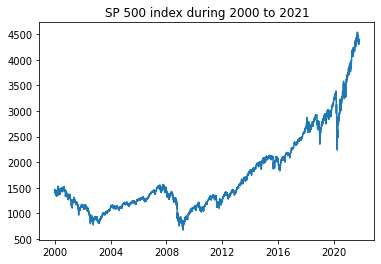

In [110]:
## Plot the SPX and VIX index
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1)
ax1.plot(combineddf.index, combineddf["SPX.Close"])
ax1.set_title("SP 500 index during 2000 to 2021")

Text(0.5, 1.0, 'VIX index during 2000 to 2021')

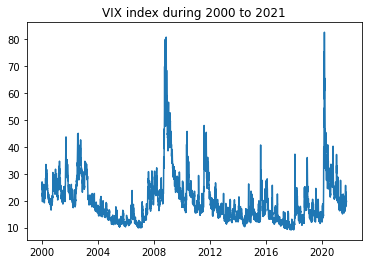

In [111]:
fig, ax1 = plt.subplots(1)
ax1.plot(combineddf.index, combineddf["VIX.Close"])
ax1.set_title("VIX index during 2000 to 2021")

In [150]:
mygarch.updateParam(paramArray)
mygarch.MaximumLikeliHood(mode = "Combined")

Nelder-Mead method Truewith Optimization terminated successfully.
Number of iterations: 301
Obj_Func_Value: -43137.469109004334
Alpha_0:2.0096868656974813e-06
Alpha_1:0.058259080395431054
beta:0.9322935295845589
lambda:0.2429210717335354
+++++++++++++++++++++++++++++
0.000002 & 0.058259 & 0.932294 & 0.242921 &


In [151]:
print("%.0f & %.0f & %.0f"%(-mygarch.LogLikehood(mode = "VIX"), -mygarch.LogLikehood(mode = "SPX"), -mygarch.LogLikehood(mode = "Combined")))
mygarch.LogLikehood(mode = "Combined", replaced= True)

25637 & 17500 & 43137


-43137.469109004334

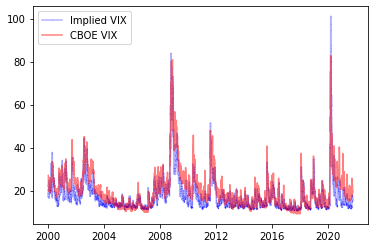

In [147]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1)
ax1.plot(mygarch._dates[0:len(mygarch._dates)-1], mygarch._impliedVIX, color = 'b', marker = 'o', markersize= 0.2, alpha = 0.3, label = "Implied VIX")
ax1.plot(mygarch._dates[0:len(mygarch._dates)-1], mygarch._vixClose[0:len(mygarch._dates)-1], color = 'r', alpha = 0.5, label = "CBOE VIX")
ax1.legend(loc="upper left")


In [152]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
epsion = mygarch._vixClose[0:len(mygarch._dates)-1] - mygarch._impliedVIX
error_describe = pd.DataFrame(epsion)
print(error_describe.describe())
print("MSE     ", mean_squared_error(mygarch._vixClose[0:len(mygarch._dates)-1], mygarch._impliedVIX))
print("MAE     ",mean_absolute_error(mygarch._vixClose[0:len(mygarch._dates)-1], mygarch._impliedVIX))

                 0
count  5477.000000
mean      0.224418
std       3.557672
min     -25.073352
25%      -2.039112
50%      -0.186611
75%       2.180941
max      19.040664
MSE      12.705084727648302
MAE      2.6333728620976804


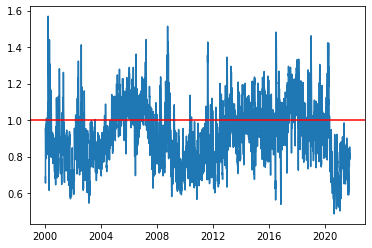

In [149]:
fig, ax1 = plt.subplots(1)
ax1.plot(mygarch._dates[0:len(mygarch._dates)-1], \
    mygarch._impliedVIX / mygarch._vixClose[0:len(mygarch._dates)-1])
ax1.axhline(y=1, color='r', linestyle='-')

In [143]:
## For mLRNVR
mygarchmLRNVR.updateParam(paramArraymLRNVR)
mygarchmLRNVR.MaximumLikeliHood(mode = "Combined", Tolerance = 1e-3)
print("%.0f & %.0f & %.0f"%(-mygarchmLRNVR.LogLikehood(mode = "VIX"), \
    -mygarchmLRNVR.LogLikehood(mode = "SPX"),\
    -mygarchmLRNVR.LogLikehood(mode = "Combined")))

Nelder-Mead method Truewith Optimization terminated successfully.
Number of iterations: 329
Obj_Func_Value: -43230.18724097633
Alpha_0:1.980735286543011e-06
Alpha_1:0.05484848824676064
beta:0.9175794510164099
lambda:0.24718709541427186
lambda2:-0.23830632259216533
+++++++++++++++++++++++++++++
0.000002 & 0.054848 & 0.917579 & 0.247187 & -0.238306


ValueError: unsupported format character '?' (0x203a) at index 15

In [144]:
mygarchmLRNVR.LogLikehood(mode = "Combined", replaced=True)
epsion = mygarchmLRNVR._vixClose[0:len(mygarchmLRNVR._dates)-1] - mygarchmLRNVR._impliedVIX
error_describe = pd.DataFrame(epsion)
print(error_describe.describe())
print("MSE    ", mean_squared_error(mygarchmLRNVR._vixClose[0:len(mygarchmLRNVR._dates)-1], mygarchmLRNVR._impliedVIX))
print("MAE    ", mean_absolute_error(mygarchmLRNVR._vixClose[0:len(mygarchmLRNVR._dates)-1], mygarchmLRNVR._impliedVIX))

                 0
count  5477.000000
mean      0.116749
std       3.551046
min     -24.802692
25%      -2.168514
50%      -0.314031
75%       2.065572
max      19.045545
MSE     12.621253793458724
MAE     2.635318589766689


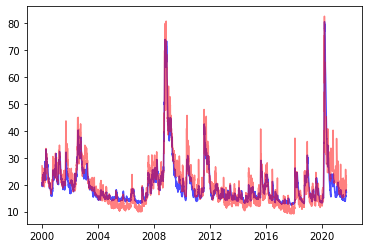

In [120]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1)
ax1.plot(mygarch._dates[0:len(mygarchmLRNVR._dates)-1], mygarchmLRNVR._impliedVIX, color = 'b', alpha = 0.7, label = "Implied VIX")
ax1.plot(mygarch._dates[0:len(mygarchmLRNVR._dates)-1], mygarchmLRNVR._vixClose[0:len(mygarchmLRNVR._dates)-1], color = 'r', alpha = 0.5, label = "CBOE VIX")

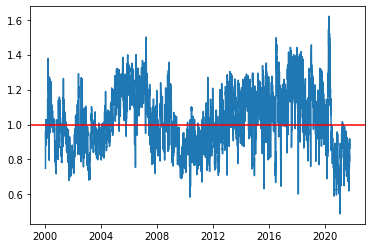

In [121]:
fig, ax1 = plt.subplots(1)
ax1.plot(mygarch._dates[0:len(mygarchmLRNVR._dates)-1], \
    mygarchmLRNVR._impliedVIX / mygarchmLRNVR._vixClose[0:len(mygarch._dates)-1])
ax1.axhline(y=1, color='r', linestyle='-')

Text(0.5, 1.0, 'Effectiveness of mLNVRN')

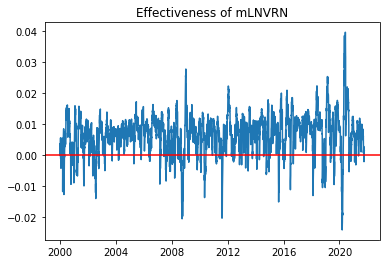

In [132]:
comparison_lnnvr = mygarch._impliedVIX / mygarch._vixClose[0:len(mygarch._dates)-1]
comparison_mlnnvr = mygarchmLRNVR._impliedVIX / mygarchmLRNVR._vixClose[0:len(mygarch._dates)-1]
fig, ax1 = plt.subplots(1)
ax1.plot(mygarch._dates[0:len(mygarchmLRNVR._dates)-1], \
    comparison_mlnnvr - comparison_lnnvr)
ax1.axhline(y=0, color='r', linestyle='-')
ax1.set_title("Effectiveness of mLNVRN")